In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [105]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=[10,8]

In [106]:
df=pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [107]:
df.shape

(145460, 23)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [110]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

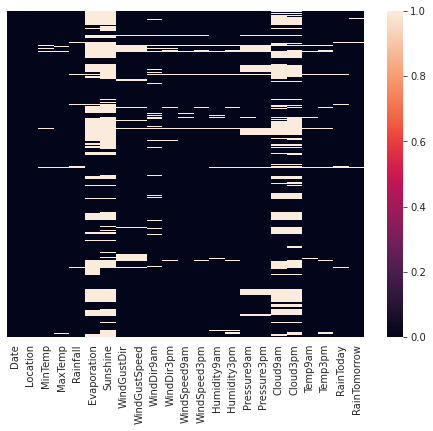

In [111]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [112]:
#removing all the null values

for i in df.columns.tolist():
    if df[i].dtype!='object':
        if df[i].isnull().sum()>50000:
            df.dropna(subset=[i],inplace=True)
        elif df[i].isnull().sum()>0:
            df[i].replace(np.nan,df[i].mean(axis=0),inplace=True)
    else:
        df.dropna(subset=[i],inplace=True)
        
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [113]:
df.shape

(73063, 23)

In [114]:
#removing the unnecessary columns
df.drop(['Date','Location'],axis=1,inplace=True)

In [115]:
df.shape

(73063, 21)

In [116]:
df['WindDir3pm'].value_counts().count()

16

In [117]:
from collections import Counter
Counter(df['RainTomorrow'])

Counter({'No': 57210, 'Yes': 15853})

In [118]:
#splitting the independent and dependent data
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [119]:
#converting the categorical values into numeric values
categorical_features=X.select_dtypes('object').columns.tolist()
categorical_features

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    X[i]=le.fit_transform(X[i])
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
6050,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
6052,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
6053,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
6054,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [121]:
X.reset_index(drop=True,inplace=True)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [122]:
X.shape

(73063, 20)

In [123]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=200,random_state=0)
etc.fit(X,y)
important_fature=pd.Series(etc.feature_importances_)

In [124]:
important_features=pd.DataFrame({'Feature':X.columns,'Value':important_fature})
important_features.set_index('Feature',inplace=True)
important_features

,Value
Feature,
MinTemp,0.037970
MaxTemp,0.037557
Rainfall,0.031581
Evaporation,0.035451
Sunshine,0.094696
WindGustDir,0.035428
WindGustSpeed,0.056518
WindDir9am,0.036832
WindDir3pm,0.035755


<AxesSubplot:ylabel='Feature'>

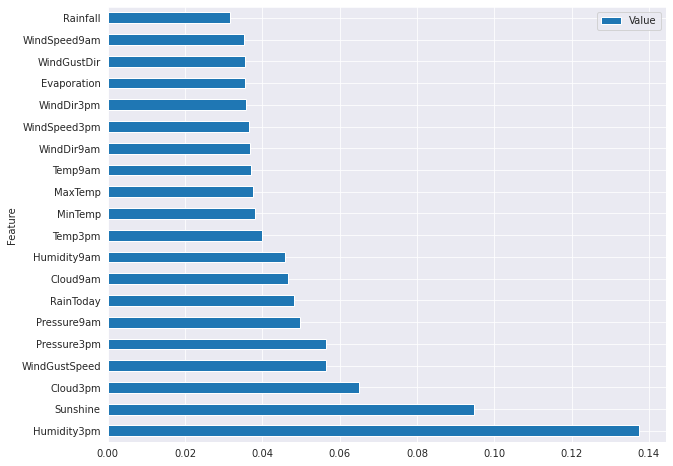

In [125]:
important_features.nlargest(20,'Value').plot(kind='barh')

<AxesSubplot:>

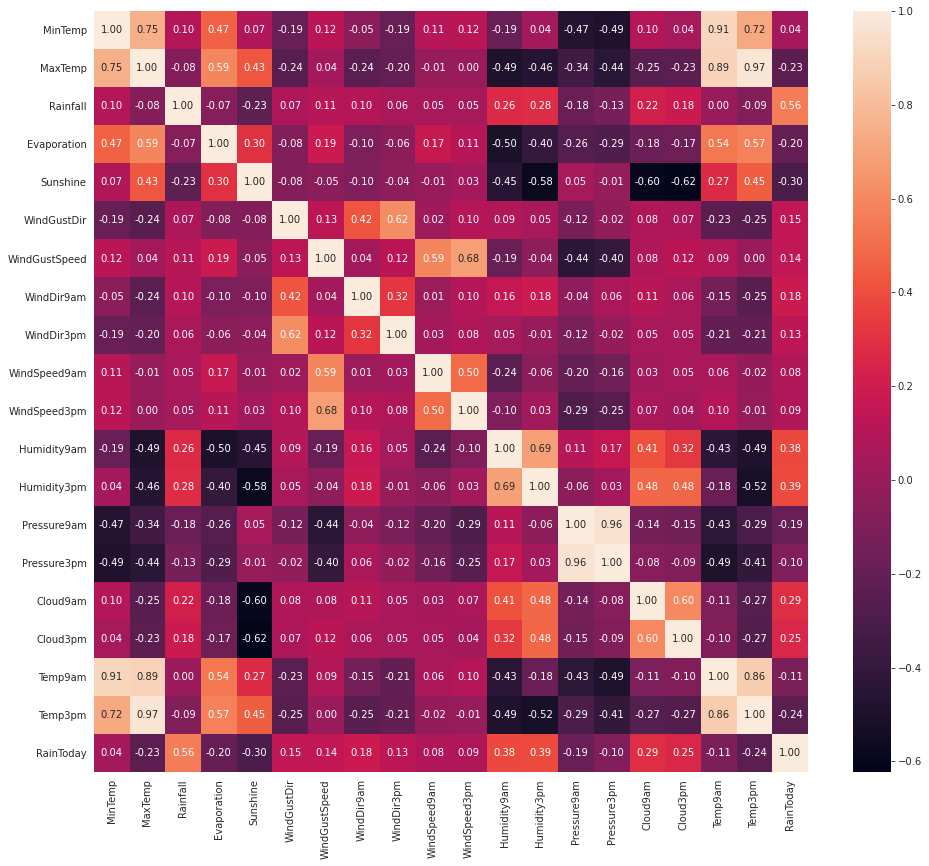

In [126]:
#plotting correlation
plt.figure(figsize=(16,14))
sns.heatmap(X.corr(),annot=True,fmt='.2f')

In [127]:
#identifying highly corelated features
corr=X.corr()
features=set()
for i in range(len(corr)):
    for j in range(i):
        if corr.iloc[i,j]>0.6:
            features.add(X.columns.tolist()[i])
features

{'Humidity3pm',
 'MaxTemp',
 'Pressure3pm',
 'Temp3pm',
 'Temp9am',
 'WindDir3pm',
 'WindSpeed3pm'}

In [128]:
#Normalization
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(58450, 20) (58450,) (14613, 20) (14613,)


In [130]:
Counter(y_train)

Counter({'No': 45751, 'Yes': 12699})

In [131]:
Counter(y_test)

Counter({'No': 11459, 'Yes': 3154})

In [154]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)

In [155]:
yhat[0:5]

array(['No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [156]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
print('Accuracy: ',accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))
print('F1 Score: ',f1_score(y_test,yhat,pos_label='Yes'))

Accuracy:  0.8050366112365702
              precision    recall  f1-score   support

          No       0.93      0.81      0.87     11459
         Yes       0.53      0.79      0.63      3154

    accuracy                           0.81     14613
   macro avg       0.73      0.80      0.75     14613
weighted avg       0.85      0.81      0.82     14613

F1 Score:  0.6349775784753363


<AxesSubplot:>

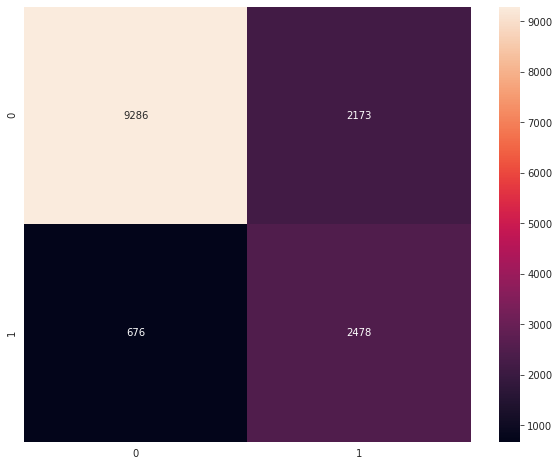

In [157]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt='.0f')

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [165]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yhat=knn.predict(X_test)

In [166]:
print('Accuracy: ',accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))
print('F1 Score: ',f1_score(y_test,yhat,pos_label='Yes'))

Accuracy:  0.8435639499076165
              precision    recall  f1-score   support

          No       0.88      0.93      0.90     11459
         Yes       0.68      0.52      0.59      3154

    accuracy                           0.84     14613
   macro avg       0.78      0.72      0.75     14613
weighted avg       0.83      0.84      0.84     14613

F1 Score:  0.5875135330205702


<AxesSubplot:>

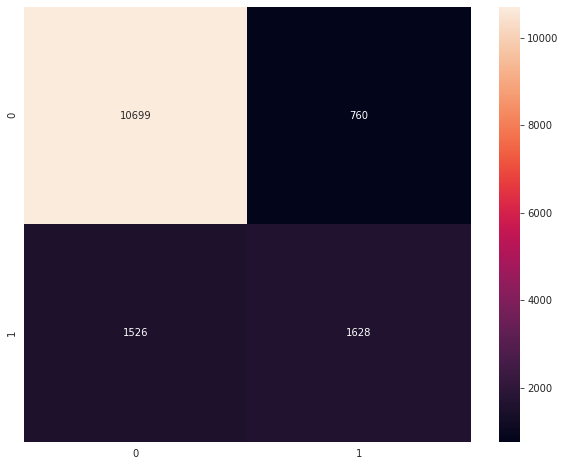

In [167]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt='.0f')

In [162]:
svm=SVC()
svm.fit(X_train,y_train)
yhat=svm.predict(X_test)

In [163]:
print('Accuracy: ',accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))
print('F1 Score: ',f1_score(y_test,yhat,pos_label='Yes'))

Accuracy:  0.8625196742626429
              precision    recall  f1-score   support

          No       0.88      0.96      0.92     11459
         Yes       0.78      0.51      0.61      3154

    accuracy                           0.86     14613
   macro avg       0.83      0.73      0.77     14613
weighted avg       0.86      0.86      0.85     14613

F1 Score:  0.6147651006711409


<AxesSubplot:>

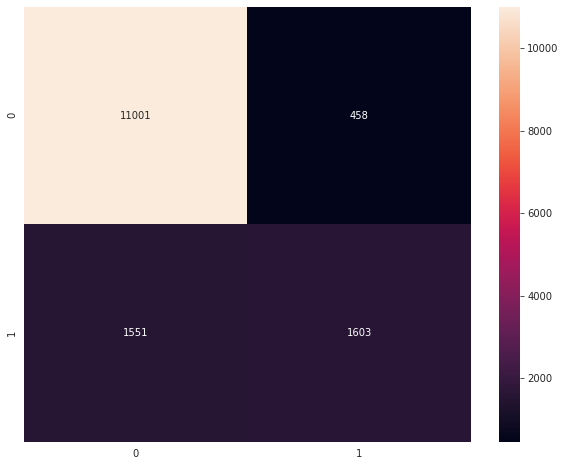

In [164]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt='.0f')

In [170]:
rf=RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)
yhat=rf.predict(X_test)

In [171]:
print('Accuracy: ',accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))
print('F1 Score: ',f1_score(y_test,yhat,pos_label='Yes'))

Accuracy:  0.8642304797098473
              precision    recall  f1-score   support

          No       0.88      0.96      0.92     11459
         Yes       0.77      0.53      0.63      3154

    accuracy                           0.86     14613
   macro avg       0.82      0.74      0.77     14613
weighted avg       0.86      0.86      0.85     14613

F1 Score:  0.6290201944652206


<AxesSubplot:>

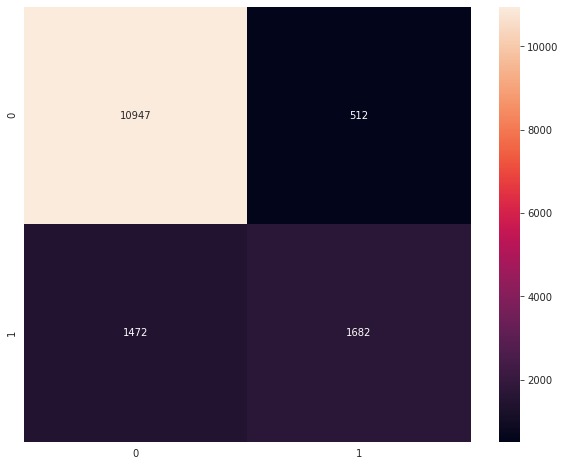

In [172]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt='.0f')